In [173]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, GlobalAveragePooling2D, Activation, Reshape, LeakyReLU, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers, initializers
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
feat_num = 21
classes = 3

# load data from df to arrays to train and test

def xls2df(df, N, split=0.8):
    # strings of feature names for reference
    # of 21 features
    feat_num = 21
    classes = 3
    feature_names = np.array([data[i][0] for i in range(1, feat_num+classes)])
    
    # load all data
    all_data = np.array([[data[i][j] for i in range(1, feat_num+1)]
                                     for j in range(1, N+1)])
    # load all labels
    all_labels = np.array([data[23][i] for i in range(1, N+1)])
    
    # shuffle indices so that no class gets huddled together
    idxs = [i for i in range(N)]
    np.random.shuffle(idxs)
    all_data = all_data[idxs]
    all_labels = all_labels[idxs]
    
    # split into 80: 20 for test: train data
    train_num = int(N*split)

    # load train data
    train_data = all_data[:train_num]
    
    # load train labels
    train_labels = all_labels[:train_num]
    
    # load test data
    test_data = all_data[train_num:]
    
    # load test labels
    test_labels = all_labels[train_num:]
    
    return train_data, train_labels, test_data, test_labels

# Test on original dataset

In [77]:
# load data
xls = pd.ExcelFile('CTG.xls')
data = pd.read_excel(xls, 'Data')

x_train, y_train, x_test, y_test = xls2df(data, 2126)
y_train = y_train-1
y_test = y_test - 1

In [78]:
densenn = Sequential()

densenn.add(Dense(512, activation="relu"))

densenn.add(Dense(8, activation="relu"))

densenn.add(Dense(3, activation="softmax"))

In [79]:
x_train = (x_train - np.min(x_train))/(np.max(x_train) - np.min(x_train))
x_test = (x_test - np.min(x_test))/(np.max(x_test) - np.min(x_test))

In [80]:
densenn.compile(optimizer="adam", loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
hist = densenn.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
107/107 [==============================] - 0s 5ms/step - loss: 0.7011 - accuracy: 0.7706 - val_loss: 0.6214 - val_accuracy: 0.7700
Epoch 2/50
107/107 [==============================] - 0s 4ms/step - loss: 0.5869 - accuracy: 0.7782 - val_loss: 0.5225 - val_accuracy: 0.7723
Epoch 3/50
107/107 [==============================] - 0s 4ms/step - loss: 0.5145 - accuracy: 0.7982 - val_loss: 0.4416 - val_accuracy: 0.8099
Epoch 4/50
107/107 [==============================] - 0s 4ms/step - loss: 0.4589 - accuracy: 0.8212 - val_loss: 0.4136 - val_accuracy: 0.8169
Epoch 5/50
107/107 [==============================] - 0s 4ms/step - loss: 0.4262 - accuracy: 0.8294 - val_loss: 0.3984 - val_accuracy: 0.8286
Epoch 6/50
107/107 [==============================] - 0s 4ms/step - loss: 0.4170 - accuracy: 0.8371 - val_loss: 0.3731 - val_accuracy: 0.8592
Epoch 7/50
107/107 [==============================] - 0s 4ms/step - loss: 0.4002 - accuracy: 0.8412 - val_loss: 0.3609 - val_accuracy: 0.8498
Epoch 

In [81]:
y_pred = densenn.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy of dense nn:", metrics.accuracy_score(y_test, y_pred))
print("F-score of dense nn:", f1_score(y_test, y_pred, average='macro'))

Accuracy of dense nn: 0.9084507042253521
F-score of dense nn: 0.8419905957950774


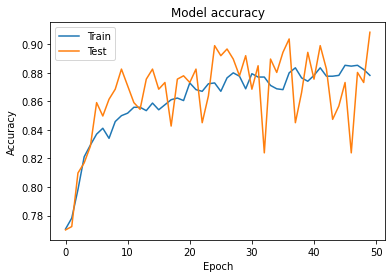

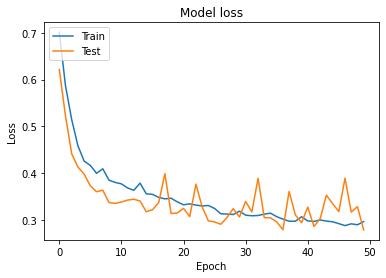

In [82]:
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure()
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Test on Artificial Dataset

In [360]:
# load data
xls = pd.ExcelFile('artificial_FINAL.xlsx')
data = pd.read_excel(xls, 'Sheet1')

x_train, y_train, x_test, y_test = xls2df(data, 5400)
y_train = y_train-1
y_test = y_test - 1

In [359]:
x_train = (x_train - np.min(x_train))/(np.max(x_train) - np.min(x_train))
x_test = (x_test - np.min(x_test))/(np.max(x_test) - np.min(x_test))

In [394]:
#init = initializers.GlorotNormal()
init = initializers.RandomNormal(stddev=0.1)

densenn1 = Sequential()

densenn1.add(Dense(1024, activation="relu", kernel_initializer=init))
densenn1.add(Dropout(0.25))

densenn1.add(Dense(32, activation="relu", kernel_initializer=init))
densenn1.add(Dropout(0.25))

densenn1.add(Dense(10, activation="relu", kernel_initializer=init))

densenn1.add(Dense(3, activation="softmax"))

In [395]:
densenn1.compile(optimizer="adam", loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
hist1 = densenn1.fit(x_train, y_train, batch_size=16, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
270/270 [==============================] - 1s 4ms/step - loss: 1.4480 - accuracy: 0.3412 - val_loss: 1.0985 - val_accuracy: 0.3481
Epoch 2/100
270/270 [==============================] - 1s 3ms/step - loss: 0.9148 - accuracy: 0.5637 - val_loss: 0.6988 - val_accuracy: 0.7389
Epoch 3/100
270/270 [==============================] - 1s 4ms/step - loss: 0.7287 - accuracy: 0.6704 - val_loss: 0.6069 - val_accuracy: 0.7833
Epoch 4/100
270/270 [==============================] - 1s 3ms/step - loss: 0.6677 - accuracy: 0.7361 - val_loss: 0.5418 - val_accuracy: 0.8157
Epoch 5/100
270/270 [==============================] - 1s 4ms/step - loss: 0.6221 - accuracy: 0.7586 - val_loss: 0.5294 - val_accuracy: 0.8167
Epoch 6/100
270/270 [==============================] - 1s 4ms/step - loss: 0.5836 - accuracy: 0.7725 - val_loss: 0.5305 - val_accuracy: 0.8009
Epoch 7/100
270/270 [==============================] - 1s 4ms/step - loss: 0.5479 - accuracy: 0.7937 - val_loss: 0.4786 - val_accuracy: 0.8250

In [396]:
y_pred = densenn1.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy of dense nn:", metrics.accuracy_score(y_test, y_pred))
print("F-score of dense nn:", f1_score(y_test, y_pred, average='macro'))

Accuracy of dense nn: 0.9055555555555556
F-score of dense nn: 0.9063331047272617


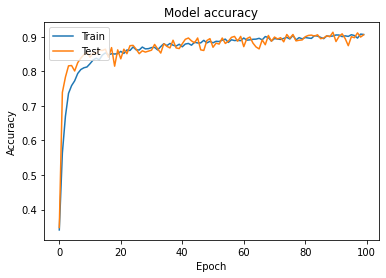

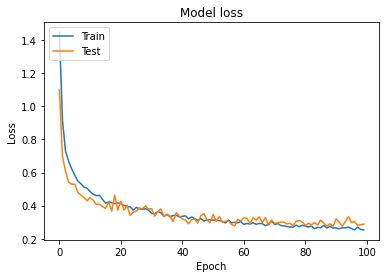

In [397]:
# Plot training & validation accuracy values
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure()
# Plot training & validation loss values
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()